## Landsat8 product

Landsat8 product stage-in example.

### Import the Python packages

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os
import sys
import glob
os.environ['_CIOP_APPLICATION_PATH']=''
sys.path.append('/opt/anaconda/bin/')
import cioppy
ciop = cioppy.Cioppy()

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from snappy import jpy
from snappy import ProductIO
from snappy import GPF
from snappy import HashMap

import gc

from shapely.wkt import loads 

### Search parameters

Set the catalogue endpoint to Sentinel-1:

In [2]:
series = 'https://catalog.terradue.com/landsat8/search'

Define the time of interest:

In [3]:
start_date = '2017-09-01T00:00:00'
stop_date = '2017-12-10T23:59:59'

Define the area of interest:

In [4]:
geom = 'MULTIPOLYGON (((6.4788 14.5973, 7.5577 14.5973, 7.5577 13.6328, 6.4788 13.6328, 6.4788 14.5973)), ((67.7116 37.9032, 68.791 37.9032, 68.791 36.9211, 67.7116 36.9211, 67.7116 37.9032)), ((-10.3668 15.3471, -9.351800000000001 15.3471, -9.351800000000001 14.3406, -10.3668 14.3406, -10.3668 15.3471)), ((67.62430000000001 36.7228, 68.116 36.7228, 68.116 35.6923, 67.62430000000001 35.6923, 67.62430000000001 36.7228)))'

Check the WKT validity:

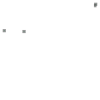

In [5]:
loads(geom)

### Build and submit the catalog search


In [6]:
search_params = dict([('geom', geom),
                     ('start', start_date),
                     ('do', 'terradue'),
                     ('stop', stop_date)])

In [7]:
search = ciop.search(end_point = series,
                     params = search_params,
                     output_fields='self,enclosure,identifier', 
                     model='GeoTime')

In [8]:
for index, elem in enumerate(search):
    print(index, elem['identifier'])

(0, 'LC08_L1TP_154035_20171210_20180525_01_T1')
(1, 'LC08_L1TP_154034_20171210_20180525_01_T1')
(2, 'LC08_L1TP_154033_20171210_20180525_01_T1')
(3, 'LC08_L1TP_190051_20171206_20171223_01_T1')
(4, 'LC08_L1TP_190050_20171206_20171223_01_T1')
(5, 'LC08_L1TP_201050_20171203_20171207_01_T1')
(6, 'LC08_L1TP_201049_20171203_20171207_01_T1')
(7, 'LC08_L1GT_153035_20171203_20171207_01_T2')
(8, 'LC08_L1GT_153034_20171203_20171207_01_T2')
(9, 'LC08_L1TP_155034_20171201_20171207_01_T1')
(10, 'LC08_L1TP_155033_20171201_20171207_01_T1')
(11, 'LC08_L1TP_189051_20171129_20171207_01_T1')
(12, 'LC08_L1TP_189050_20171129_20171207_01_T1')
(13, 'LC08_L1TP_200050_20171126_20171206_01_T1')
(14, 'LC08_L1TP_200049_20171126_20171206_01_T1')
(15, 'LC08_L1GT_154035_20171124_20171206_01_T2')
(16, 'LC08_L1TP_154034_20171124_20171206_01_T1')
(17, 'LC08_L1TP_154033_20171124_20171206_01_T1')
(18, 'LC08_L1TP_190051_20171120_20171206_01_T1')
(19, 'LC08_L1TP_190050_20171120_20171206_01_T1')


In [9]:
ls8_index = 2

In [10]:
ls8_identifier = search[ls8_index]['identifier']
ls8_reference = search[ls8_index]['self']

Prepare the variables assignment for the Jupyter Notebook streaming executable

In [11]:
print 'input_identifier = \'%s\'' % ls8_identifier

input_identifier = 'LC08_L1TP_154033_20171210_20180525_01_T1'


In [12]:
print 'input_reference = \'%s\'' % ls8_reference

input_reference = 'https://catalog.terradue.com/landsat8/search?format=atom&uid=LC08_L1TP_154033_20171210_20180525_01_T1'


### Stage-in the data

Define the local folder where to stage-in the data to:

In [13]:
data_path = os.path.join(os.sep,'workspace','tmp','data')

In [14]:
if not os.path.isdir(data_path):
    os.makedirs(data_path)

In [15]:
try:
    retrieved = ciop.copy(search[ls8_index]['enclosure'], data_path)
except:
    retrieved = os.path.join(data_path, search[ls8_index]['identifier'])

In [18]:
product_path = os.path.join(data_path, ls8_identifier)

if not os.path.isdir(product_path):
    os.makedirs(product_path)

os.chdir(product_path)

import tarfile
tar = tarfile.open(retrieved)
tar.extractall()
tar.close()

### List Archive content


In [19]:
products = [ name for name in os.listdir('.') ]

products

['LC08_L1TP_154033_20171210_20180525_01_T1_ANG.txt',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B1.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B10.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B11.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B2.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B3.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B4.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B5.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B6.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B7.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B8.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_B9.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_BQA.TIF',
 'LC08_L1TP_154033_20171210_20180525_01_T1_MTL.txt']